#### Importando Bibliotecas

In [243]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.metrics import multilabel_confusion_matrix 
from sklearn.model_selection import GridSearchCV
import random
from sklearn.tree import DecisionTreeClassifier as DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.tree import plot_tree 
import pickle

##### Lendo e separando as features do Dataset

In [244]:
waits = pd.read_csv("amostra_V1_classificado.csv", sep=';')

features = ['PAGEIOLATCH_EX', 'PAGEIOLATCH_UP', 'PAGEIOLATCH_SH',
       'SOS_SCHEDULER_YIELD', 'RESOURCE_SEMAPHORE', 'CMEMTHREAD',
       'IO_COMPLETION', 'ASYNC_IO_COMPLETION', 'WRITELOG', 'ASYNC_NETWORK_IO', 'DBMIRROR_SEND']
targets = ['problema_CPU', 'problema_Memoria', 'problema_Disco', 'problema_Rede']

X_var = waits[features].values
y_var = waits[targets].values 

waits.head()

,PAGEIOLATCH_EX,PAGEIOLATCH_UP,PAGEIOLATCH_SH,SOS_SCHEDULER_YIELD,RESOURCE_SEMAPHORE,CMEMTHREAD,IO_COMPLETION,ASYNC_IO_COMPLETION,WRITELOG,ASYNC_NETWORK_IO,DBMIRROR_SEND,problema_CPU,problema_Memoria,problema_Disco,problema_Rede
0,0.011639,1.884108,0.109635,2.986915,0.000085,0.003928,0.048453,0.172045,1.834795,92.948397,0,0,0,0,1
1,0.008449,2.067299,0.497194,3.070093,0.022245,0.000588,0.157902,0.784469,3.201486,90.190275,0,0,0,0,1
2,0.042441,1.315710,0.801015,2.066206,0.000000,0.000013,0.368965,2.296457,11.634794,81.474398,0,0,0,0,1
3,0.017231,9.654880,2.603793,1.315881,0.000000,0.000757,0.060692,1.481010,7.879040,76.986718,0,0,0,0,1
4,0.007250,2.953593,1.062192,10.401626,0.000000,0.007344,1.286435,1.058596,6.969384,76.253581,0,0,0,0,1


In [245]:
type(features)

list

#### Informações sobre o Dataset

In [246]:
waits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PAGEIOLATCH_EX       35 non-null     float64
 1   PAGEIOLATCH_UP       35 non-null     float64
 2   PAGEIOLATCH_SH       35 non-null     float64
 3   SOS_SCHEDULER_YIELD  35 non-null     float64
 4   RESOURCE_SEMAPHORE   35 non-null     float64
 5   CMEMTHREAD           35 non-null     float64
 6   IO_COMPLETION        35 non-null     float64
 7   ASYNC_IO_COMPLETION  35 non-null     float64
 8   WRITELOG             35 non-null     float64
 9   ASYNC_NETWORK_IO     35 non-null     float64
 10  DBMIRROR_SEND        35 non-null     int64  
 11  problema_CPU         35 non-null     int64  
 12  problema_Memoria     35 non-null     int64  
 13  problema_Disco       35 non-null     int64  
 14  problema_Rede        35 non-null     int64  
dtypes: float64(10), int64(5)
memory usage: 4.2

#### Divisão dos conjuntos de Teste e Treinamento

In [247]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 5)

#### Procurando os melhores hiper-parametros para o modelo com GridSearchCV


In [257]:
randomState = [random.randint(0, 100) for i in range(100)]

decisionTree = DecisionTreeClassifier()

params = {
    'criterion':['gini', 'entropy', 'log_loss'],    
    'random_state':randomState
}

clf = GridSearchCV(
    estimator=decisionTree,
    param_grid=params,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

clf.fit(X_train, y_train)

print(clf.best_params_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
{'criterion': 'entropy', 'random_state': 25}


#### Rodando o Algoritmo com os Parêmetros Sugeridos pelo GridSearchCV

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 5, random_state=25)

model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print('Acurácia: {:.0%}'.format(accuracy_score(y_test, pred_model)))

Acurácia: 60%


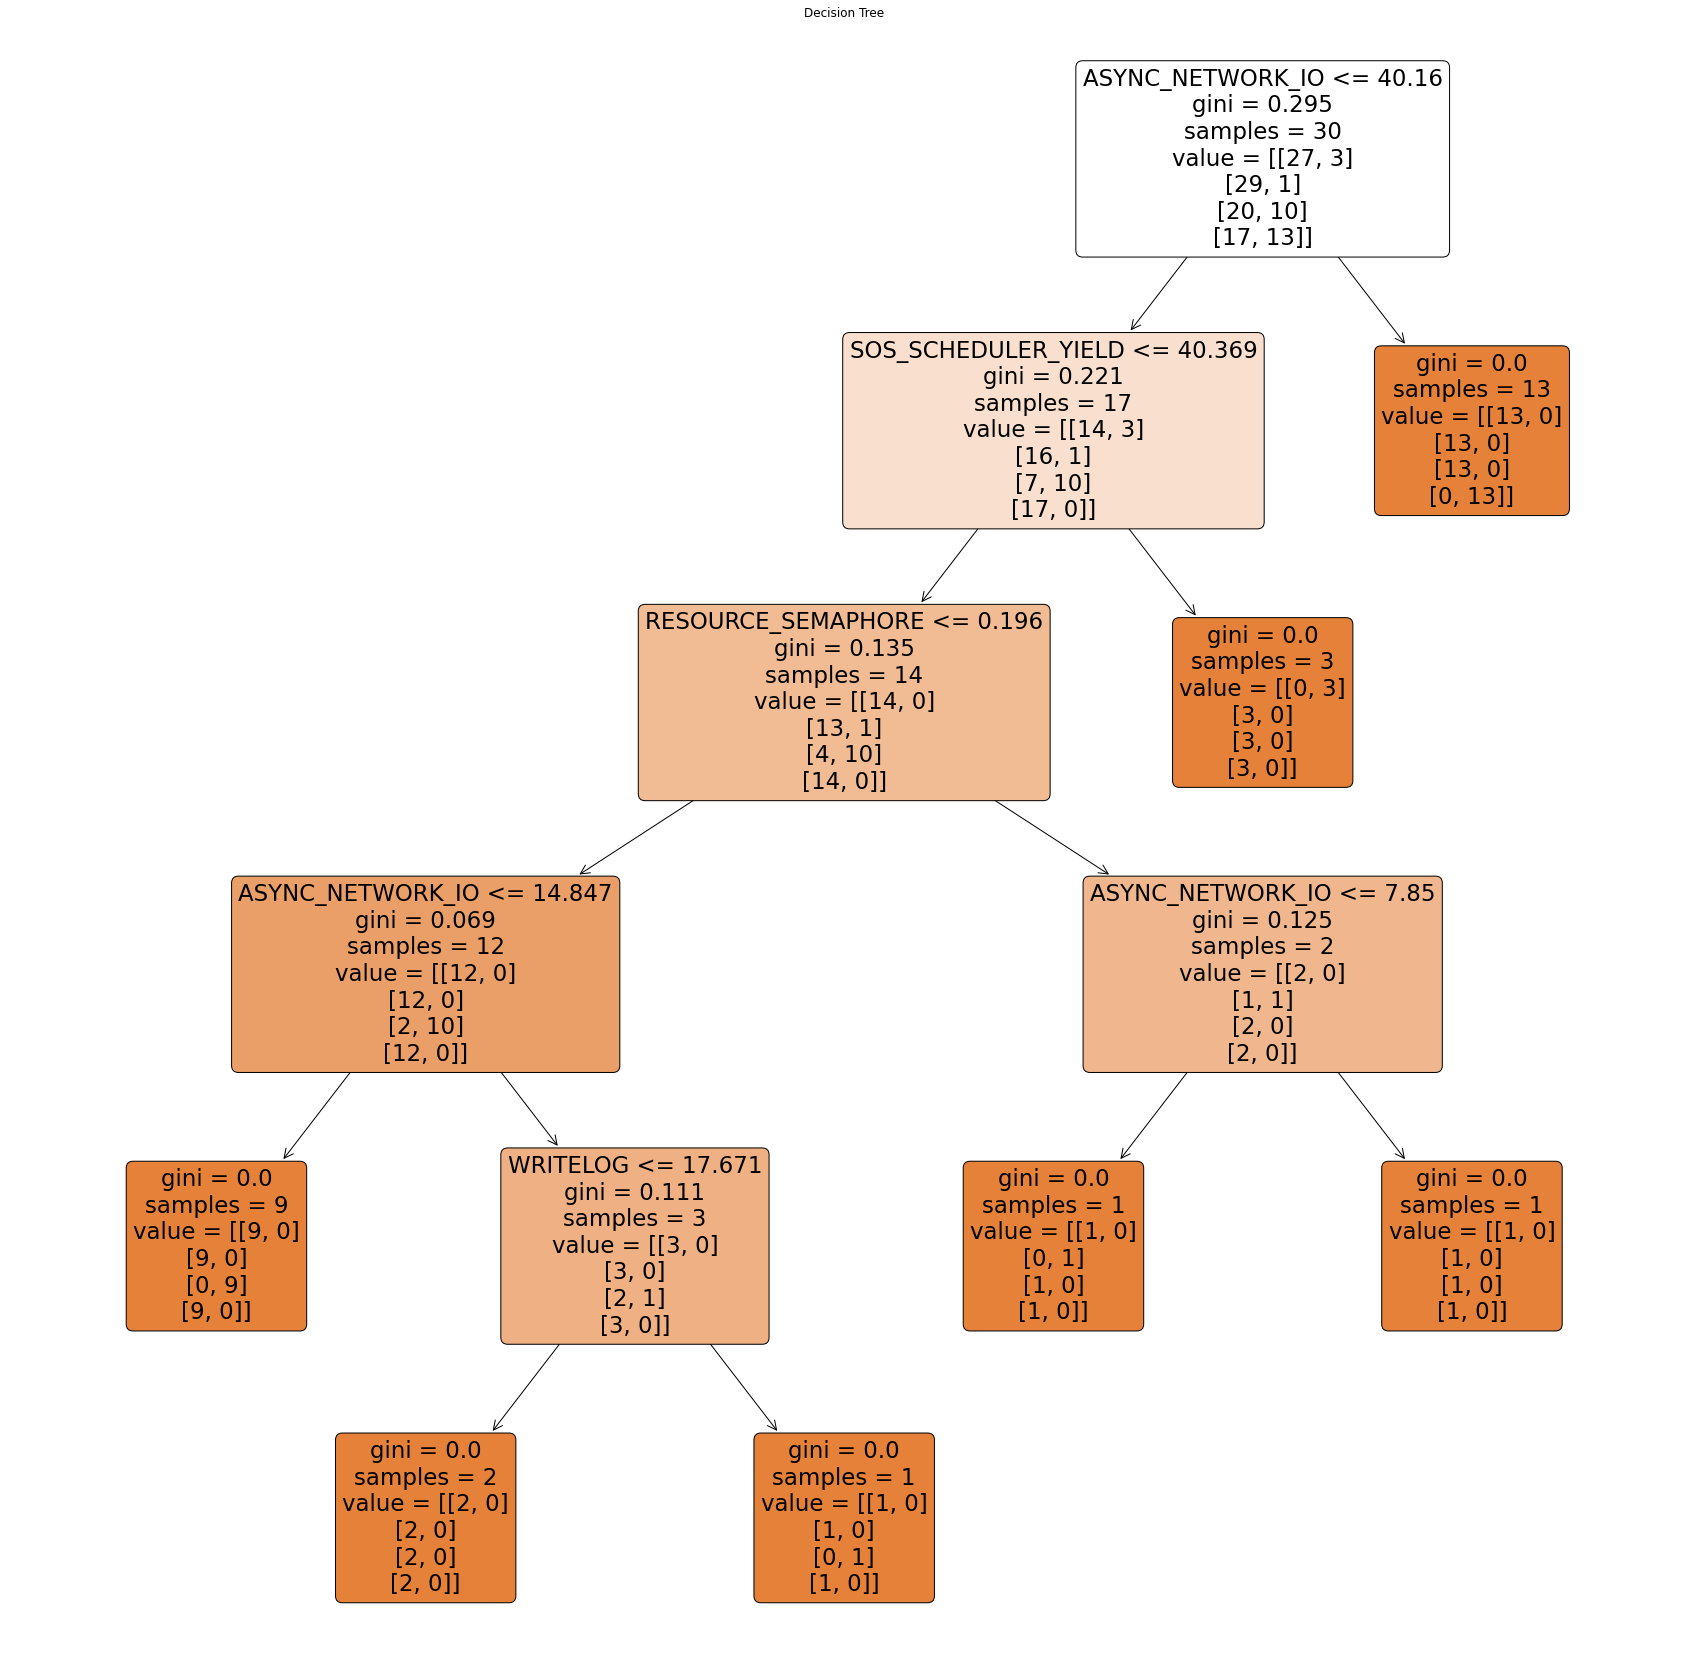

In [250]:
_, ax = plt.subplots(figsize=(30,30))

plot_tree(model, 
          feature_names = features, 
          class_names = targets, 
          filled = True, 
          rounded = True,
          ax=ax         
          )
          
plt.title("Decision Tree")
plt.savefig('DecisionTree__V1.1.png')

In [251]:
y_true = y_test
y_pred  = pred_model

cm = multilabel_confusion_matrix(y_true, y_pred)
print(cm)

[[[4 0]
  [0 1]]

 [[5 0]
  [0 0]]

 [[2 0]
  [1 2]]

 [[3 0]
  [0 2]]]


#### Exportando o modelo treinado (.pkl)

In [252]:
decision_tree_pkl_filename = 'DecisionTree__V1.1.pkl'

decision_tree_model_pkl = open(decision_tree_pkl_filename, 'wb')

pickle.dump(model, decision_tree_model_pkl)

decision_tree_model_pkl.close()